In [ ]:
marketing_data <- read.csv("marketing.csv")
head(marketing_data)

,index,Television,Socia_Network,newspaper,Turnover
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,200.92,142.17,145.41,943.0419
2,2,156.26,129.85,62.70,856.2597
3,3,124.38,187.57,140.04,964.9689
4,4,157.69,187.48,143.94,1017.4412
5,5,158.23,222.41,116.04,1115.2990
6,6,132.48,181.55,119.84,932.3739


In [ ]:
model_tv <- lm(Turnover ~ Television, data = marketing_data)
summary(model_tv)


Call:
lm(formula = Turnover ~ Television, data = marketing_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-255.773  -77.986    6.763   72.171  307.943 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 630.2766    42.5450  14.814  < 2e-16 ***
Television    2.1990     0.2802   7.848  2.6e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 107.4 on 198 degrees of freedom
Multiple R-squared:  0.2373,	Adjusted R-squared:  0.2334 
F-statistic: 61.59 on 1 and 198 DF,  p-value: 2.597e-13


In [ ]:
model_sn <- lm(Turnover ~ Socia_Network, data = marketing_data)
summary(model_sn)


Call:
lm(formula = Turnover ~ Socia_Network, data = marketing_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-181.504  -32.874    2.386   34.283  134.180 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   467.45415   17.01935   27.47   <2e-16 ***
Socia_Network   2.83909    0.09594   29.59   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 52.82 on 198 degrees of freedom
Multiple R-squared:  0.8156,	Adjusted R-squared:  0.8146 
F-statistic: 875.6 on 1 and 198 DF,  p-value: < 2.2e-16


In [ ]:
model_np <- lm(Turnover ~ newspaper, data = marketing_data)
summary(model_np)


Call:
lm(formula = Turnover ~ newspaper, data = marketing_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-340.36  -84.53   -5.69   92.89  385.69 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 960.0327    31.5268  30.451   <2e-16 ***
newspaper    -0.0123     0.3014  -0.041    0.967    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 123 on 198 degrees of freedom
Multiple R-squared:  8.412e-06,	Adjusted R-squared:  -0.005042 
F-statistic: 0.001666 on 1 and 198 DF,  p-value: 0.9675


In [ ]:
#Hồi quy đa biến với biến Television, Socia_Network, newspaper
model_multi <- lm(Turnover ~ Television + Socia_Network + newspaper, data = marketing_data)
summary(model_multi)


Call:
lm(formula = Turnover ~ Television + Socia_Network + newspaper, 
    data = marketing_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-37.571  -9.826   0.581   9.575  40.175 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   202.19448    7.93632  25.477   <2e-16 ***
Television      1.86693    0.03832  48.714   <2e-16 ***
Socia_Network   2.73133    0.02668 102.382   <2e-16 ***
newspaper       0.04969    0.03590   1.384    0.168    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.62 on 196 degrees of freedom
Multiple R-squared:  0.986,	Adjusted R-squared:  0.9858 
F-statistic:  4605 on 3 and 196 DF,  p-value: < 2.2e-16


In [ ]:
model_reduced <- lm(Turnover ~ Television + Socia_Network, data = marketing_data)
summary(model_reduced)
#Nhận thấy giá trị Adjusted R-squared giảm rất ít khi bỏ đi biến newspaper


Call:
lm(formula = Turnover ~ Television + Socia_Network, data = marketing_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-38.589  -9.631   0.468   9.658  38.351 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   207.06397    7.13046   29.04   <2e-16 ***
Television      1.86966    0.03836   48.74   <2e-16 ***
Socia_Network   2.72971    0.02671  102.18   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.65 on 197 degrees of freedom
Multiple R-squared:  0.9859,	Adjusted R-squared:  0.9857 
F-statistic:  6875 on 2 and 197 DF,  p-value: < 2.2e-16


In [ ]:
AIC(model_multi, model_reduced)
#Nhận thấy mô hình với biến newspaper bị loại bỏ có chỉ số AIC thấp hơn

,df,AIC
,<dbl>,<dbl>
model_multi,5,1646.483
model_reduced,4,1646.428


In [ ]:
# Shapiro-Wilk test
shapiro.test(residuals(model_reduced))


	Shapiro-Wilk normality test

data:  residuals(model_reduced)
W = 0.9945, p-value = 0.676


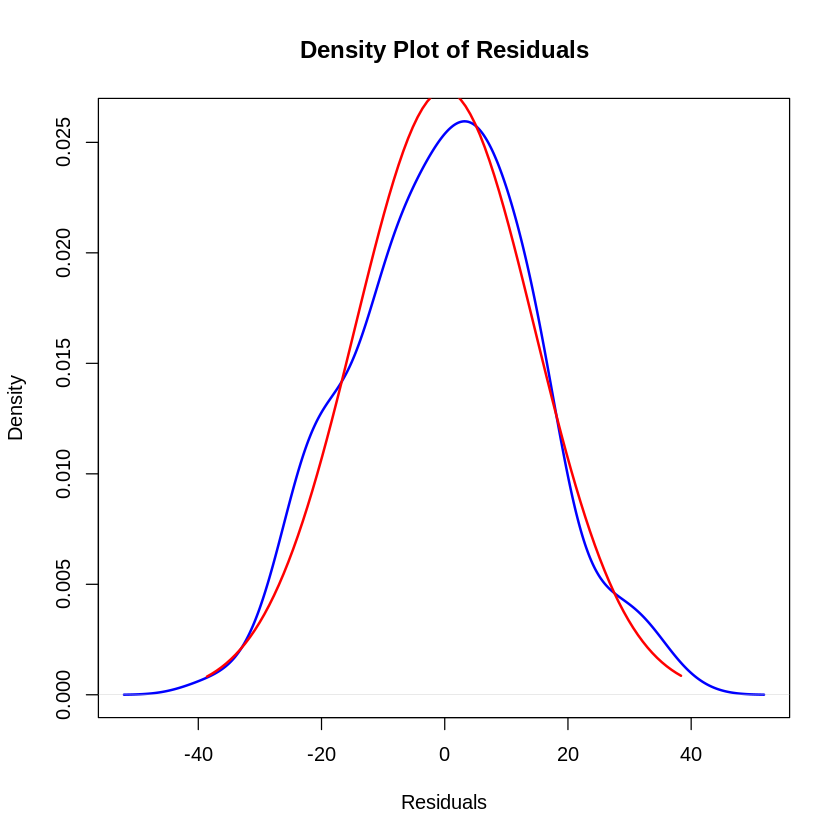

In [ ]:
#Kiểm tra sai số ngẫu nhiên có phân phối chuẩn
residuals_reduced <- residuals(model_reduced)
plot(density(residuals_reduced),
     main = "Density Plot of Residuals",
     xlab = "Residuals",
     ylab = "Density",
     col = "blue",
     lwd = 2)
# Vẽ thêm một đường phân phối chuẩn để so sánh
x <- seq(min(residuals_reduced), max(residuals_reduced), length=100)
y <- dnorm(x, mean=mean(residuals_reduced), sd=sd(residuals_reduced))
lines(x, y, col="red", lwd=2)

In [ ]:
#Kiểm tra các biến độc lập không có mối quan hệ đa cộng tuyến
install.packages("car")
library(car)
vif_values <- vif(model_reduced)
print(vif_values)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Loading required package: carData



   Television Socia_Network 
     1.007108      1.007108 


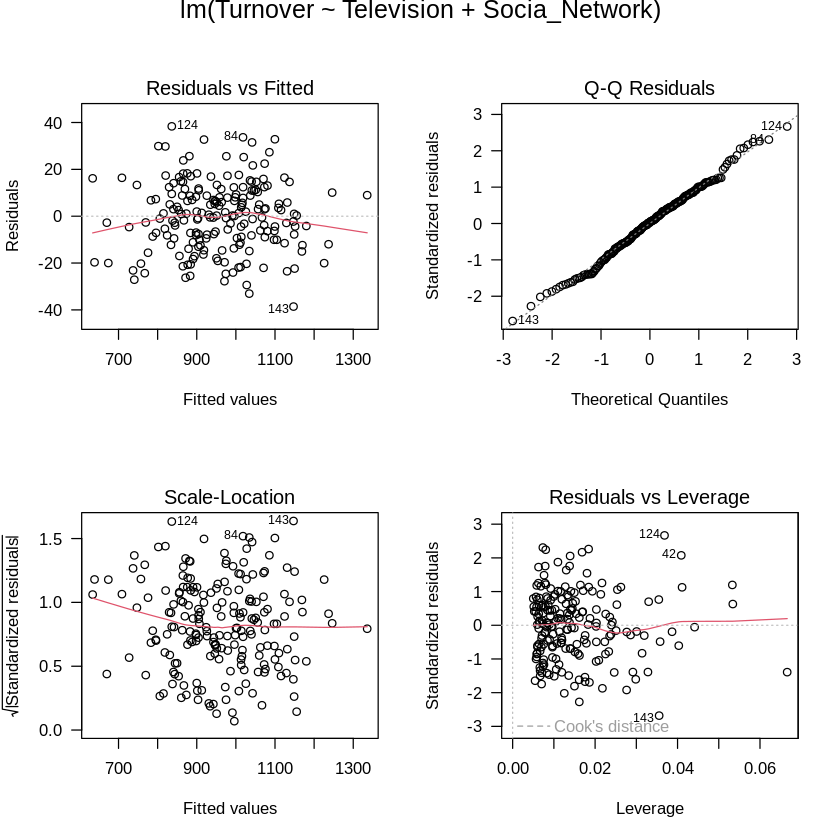

In [ ]:
#Robust regression
opar <- par(mfrow = c(2,2), oma = c(0, 0, 1.1, 0))
plot(model_reduced, las = 1)

In [ ]:
marketing_data[c(42,84,124,143),]

,index,Television,Socia_Network,newspaper,Turnover
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
42,42,191.40,93.34,78.97,849.4839
84,84,144.66,198.07,110.55,1051.8756
124,124,81.35,174.74,60.06,874.5008
143,143,124.60,259.12,75.91,1108.7567


In [ ]:
#Hiển thị các điểm có Cook's distance lớn nhất
#Nhận thấy standardized residual của các điểm này cũng lớn
d1 <- cooks.distance(model_reduced)
r <- rstandard(model_reduced)
a <- cbind(marketing_data, d1, r)
a[d1>4/200,]

,index,Television,Socia_Network,newspaper,Turnover,d1,r
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,200.92,142.17,145.41,943.0419,0.03496637,-1.920892
9,9,189.76,173.05,103.53,1001.1707,0.02833113,-2.274248
10,10,117.25,115.05,133.46,713.2191,0.02596793,-1.870884
42,42,191.40,93.34,78.97,849.4839,0.06119895,2.074897
68,68,137.47,232.85,115.60,1132.5393,0.03201872,2.262075
95,95,94.85,129.23,59.28,714.0127,0.02639125,-1.603839
107,107,191.05,174.80,121.68,1072.9130,0.02683773,2.167828
124,124,81.35,174.74,60.06,874.5008,0.09065872,2.666733
131,131,69.30,200.74,145.27,901.6549,0.02687114,1.196670


In [ ]:
# Sử dụng mô hình hồi quy Robust
require(foreign)
require(MASS)
summary(rr.huber <- rlm(Turnover ~ Television + Socia_Network, data = marketing_data))


Call: rlm(formula = Turnover ~ Television + Socia_Network, data = marketing_data)
Residuals:
     Min       1Q   Median       3Q      Max 
-38.6094  -9.5127   0.6405   9.7805  38.8503 

Coefficients:
              Value    Std. Error t value 
(Intercept)   205.5353   7.4851    27.4592
Television      1.8755   0.0403    46.5710
Socia_Network   2.7329   0.0280    97.4545

Residual standard error: 14.56 on 197 degrees of freedom


Call: rlm(formula = Turnover ~ Television + Socia_Network, data = marketing_data)
Residuals:
     Min       1Q   Median       3Q      Max 
-38.6094  -9.5127   0.6405   9.7805  38.8503 

Coefficients:
              Value    Std. Error t value 
(Intercept)   205.5353   7.4851    27.4592
Television      1.8755   0.0403    46.5710
Socia_Network   2.7329   0.0280    97.4545

Residual standard error: 14.56 on 197 degrees of freedom

In [ ]:
# Hàm lỗi huber cho ra kết quả mô hình với giá trị adjusted R-squared cao hơn trước đó
weights <- rr.huber$w
weight_lm <- lm(Turnover ~ Television + Socia_Network, data = marketing_data, weights=weights)
summary(weight_lm)


Call:
lm(formula = Turnover ~ Television + Socia_Network, data = marketing_data, 
    weights = weights)

Weighted Residuals:
     Min       1Q   Median       3Q      Max 
-27.4978  -9.5127   0.6405   9.7805  27.5840 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   205.53529    6.64297   30.94   <2e-16 ***
Television      1.87546    0.03609   51.97   <2e-16 ***
Socia_Network   2.73290    0.02503  109.17   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.39 on 197 degrees of freedom
Multiple R-squared:  0.9878,	Adjusted R-squared:  0.9876 
F-statistic:  7944 on 2 and 197 DF,  p-value: < 2.2e-16


In [ ]:
# Hàm lỗi Turkey
rr.bisquare <- rlm(Turnover ~ Television + Socia_Network, data = marketing_data, psi = psi.bisquare)
summary(rr.bisquare)


Call: rlm(formula = Turnover ~ Television + Socia_Network, data = marketing_data, 
    psi = psi.bisquare)
Residuals:
     Min       1Q   Median       3Q      Max 
-38.8423  -9.5432   0.4956   9.6766  38.5808 

Coefficients:
              Value    Std. Error t value 
(Intercept)   205.8582   7.4702    27.5572
Television      1.8728   0.0402    46.5969
Socia_Network   2.7338   0.0280    97.6828

Residual standard error: 14.38 on 197 degrees of freedom

In [ ]:
weights <- rr.bisquare$w

In [ ]:
weight_lm_turkey <- lm(Turnover ~ Television + Socia_Network, data = marketing_data, weights = weights)
summary(weight_lm_turkey)


Call:
lm(formula = Turnover ~ Television + Socia_Network, data = marketing_data, 
    weights = weights)

Weighted Residuals:
     Min       1Q   Median       3Q      Max 
-25.9302  -9.3512   0.4956   9.4769  25.9276 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   205.85820    6.58207   31.28   <2e-16 ***
Television      1.87277    0.03558   52.63   <2e-16 ***
Socia_Network   2.73384    0.02470  110.70   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.86 on 197 degrees of freedom
Multiple R-squared:  0.988,	Adjusted R-squared:  0.9879 
F-statistic:  8113 on 2 and 197 DF,  p-value: < 2.2e-16


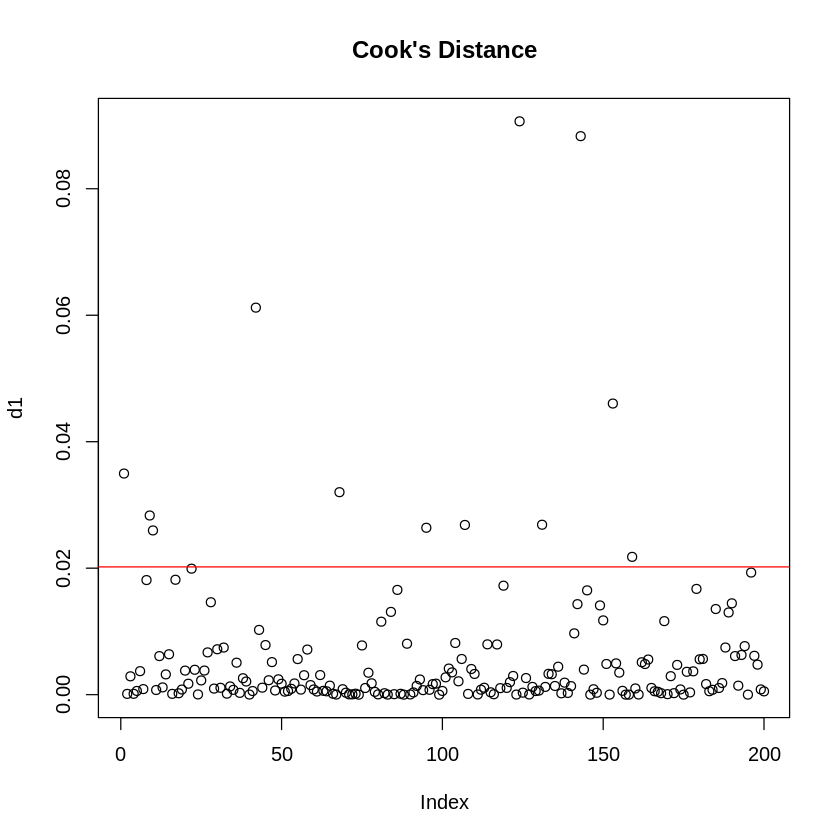

In [ ]:
plot(d1, pch = 1, cex=1, main = "Cook's Distance")
abline(h = 4/(nrow(marketing_data) - 2), col = "red")

Có thể nói có ít điểm outliers, và distance không quá lớn, nên ta thấy mô hình với hàm lỗi Huber và Turkey có khác biệt không lớn trong giá trị adjusted R-squared


In [ ]:
# Lasso regression
install.packages("glmnet")
library(glmnet)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’, ‘RcppEigen’


Loading required package: Matrix

Loaded glmnet 4.1-8



In [ ]:
x <- as.matrix(marketing_data[, c("Television", "Socia_Network", "newspaper")])
y <- marketing_data$Turnover

In [ ]:
cv_model <- cv.glmnet(x, y, alpha = 1,nlambda = 100)

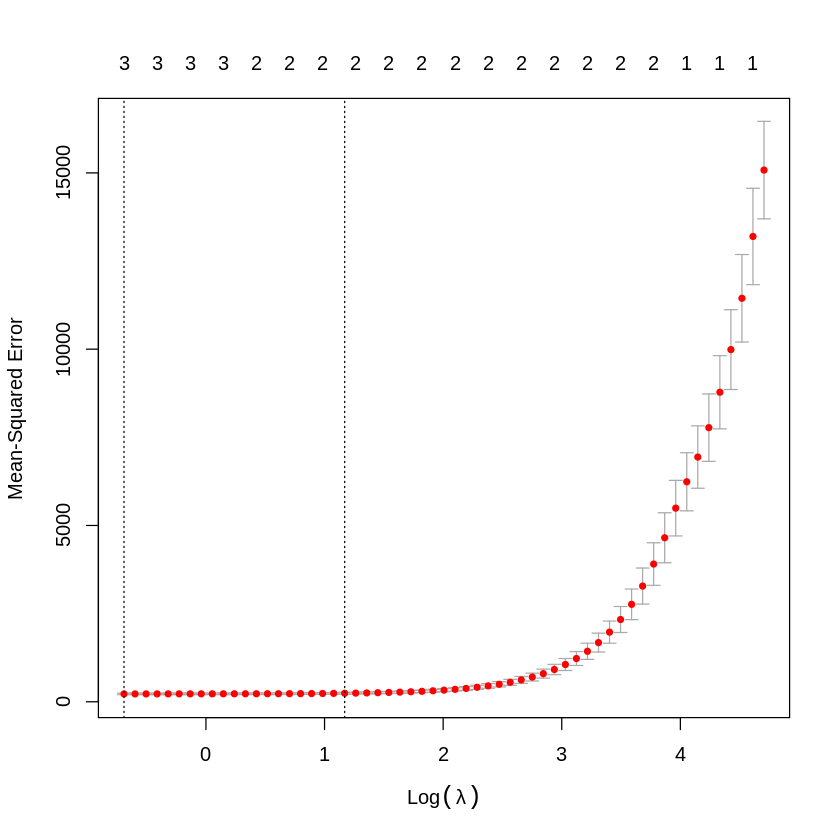

In [ ]:
plot(cv_model, cex = 1, pch = 19)

In [ ]:
best_lambda <- cv_model$lambda.min
best_lambda

[1] 0.5011549

In [ ]:
lasso_model <- glmnet(x, y, alpha = 1, lambda = best_lambda)
coef(lasso_model)

4 x 1 sparse Matrix of class "dgCMatrix"
                        s0
(Intercept)   208.49422835
Television      1.85082569
Socia_Network   2.71888586
newspaper       0.03238314

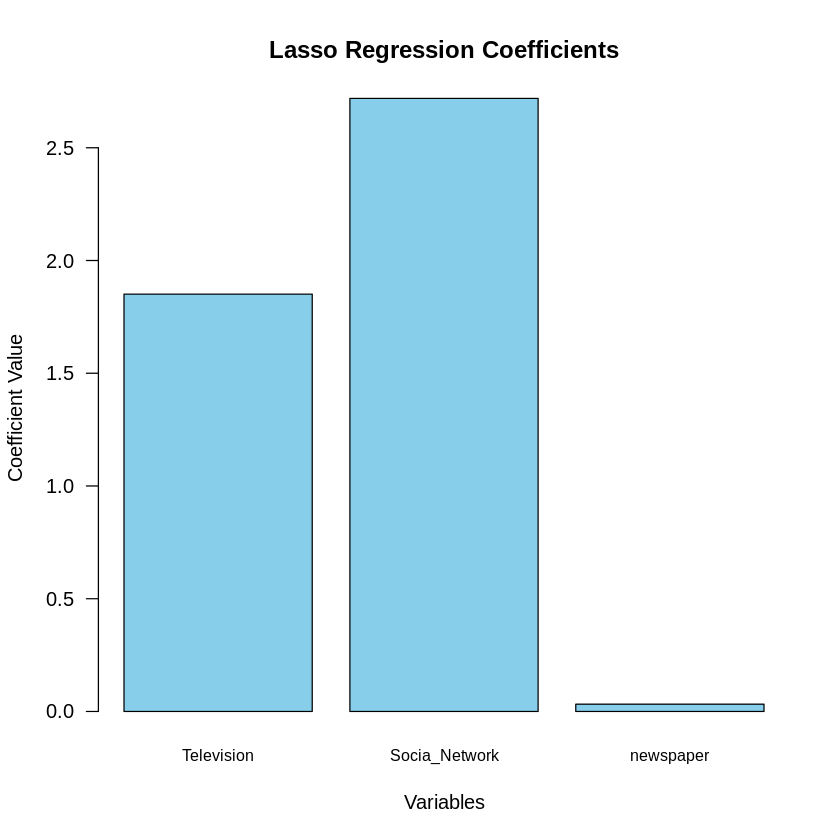

In [ ]:
# Biến Socia_network có hệ số lớn nhất cho thấy chiến dịch truyền thông qua mạng xã hội có ảnh hưởng lớn nhất tới doanh thu
# Biến newspaper có hệ số tương đối nhỏ, cho thấy ít ý nghĩa với mô hình
lasso_coefficients <- as.vector(coef(lasso_model))
names(lasso_coefficients) <- rownames(coef(lasso_model))

lasso_coefficients <- lasso_coefficients[-1]

barplot(lasso_coefficients,
        main = "Lasso Regression Coefficients",
        xlab = "Variables",
        ylab = "Coefficient Value",
        col = "skyblue",
        las = 1,
        cex.names = 0.8
)

In [ ]:
# Đánh giá mô hình dựa trên R-squared
# Kết quả cho thấy mô hình phù hợp với dữ liệu ở mức 98.6%
y_predicted <- predict(lasso_model, s = best_lambda, newx = x)
sst <- sum((y - mean(y))^2)
sse <- sum((y_predicted - y)^2)
rsq <- 1 - sse/sst
rsq

[1] 0.9859645

In [ ]:
# Dự đoán các giá trị bất kì
new_data <- data.frame(Television = 120, Social_Network = 220, newspaper = 10)
new_data_matrix <- as.matrix(new_data)
turnover_predicted <- predict(lasso_model, s = best_lambda, newx = new_data_matrix)
print(turnover_predicted)

           s1
[1,] 1029.072
